In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [97]:
df = pd.read_csv('train.csv')

# 【課題1】練習のために特徴量の選択

### データセットを読み込んだ後、GrLivAreaとYearBuiltを抜き出してください。

In [98]:
df[['GrLivArea','YearBuilt']]

,GrLivArea,YearBuilt
0,1710,2003
1,1262,1976
2,1786,2001
3,1717,1915
4,2198,2000
5,1362,1993
6,1694,2004
7,2090,1973
8,1774,1931
9,1077,1939


In [99]:
df[['GrLivArea','YearBuilt']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
GrLivArea    1460 non-null int64
YearBuilt    1460 non-null int64
dtypes: int64(2)
memory usage: 22.9 KB


In [100]:
df[['GrLivArea','YearBuilt']].describe()

,GrLivArea,YearBuilt
count,1460.000000,1460.000000
mean,1515.463699,1971.267808
std,525.480383,30.202904
min,334.000000,1872.000000
25%,1129.500000,1954.000000
50%,1464.000000,1973.000000
75%,1776.750000,2000.000000
max,5642.000000,2010.000000


/anaconda3/envs/DIC/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


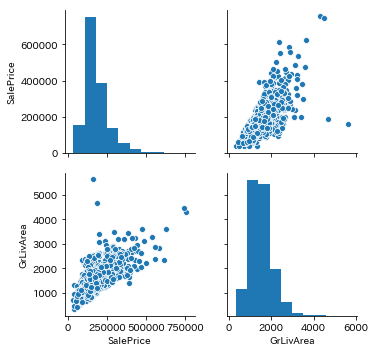

/anaconda3/envs/DIC/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


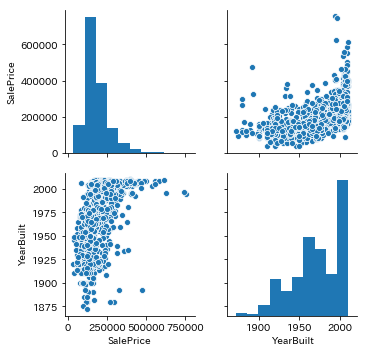

In [101]:
sns.pairplot(df[['SalePrice','GrLivArea']], size = 2.5)
plt.show()
#特徴量のプロット非線形と言えなくもないので確認する
sns.pairplot(df[['SalePrice','YearBuilt']], size = 2.5)
plt.show()
#特徴量のプロット非線形と言えなくもないので確認する

# 【課題2】回帰問題のパイプライン

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

## 前処理 describe()で情報を見ると分散がかなり違うので標準化して特徴量の値を揃える。

["参考サイト多項式について"](http://tekenuko.hatenablog.com/entry/2016/09/19/193520)

In [103]:
#テストデータが必要なのでデータセットを１２００で分割する
#そのあと対数変換
X_train = np.log(df.loc[:1200,['GrLivArea','YearBuilt']])
X_train_std = sc.fit_transform(X_train)
X_test =np.log(df.loc[1200:,['GrLivArea','YearBuilt']])
X_test_std = sc.fit_transform(X_test)

In [104]:
y_train = np.log(df.loc[:1200,['SalePrice']])
y_test = np.log(df.loc[1200:,['SalePrice']])

In [105]:
#パイプラインを作る
#２次元の多項式を設定
regr = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())
])
reg = regr.fit(X_train_std, y_train)

In [106]:
reg.score(X_train_std, y_train)

0.7368756956123843

### ３次元の多項式を設定

In [107]:
regr_d3 = Pipeline([
    ('poly', PolynomialFeatures(degree=3)),
    ('linear', LinearRegression())
])
reg = regr_d3.fit(X_train_std, y_train)

In [108]:
reg.score(X_train_std, y_train)


0.7439500455812423

#### ３次元の多項式としても２次元とあまり変わらないので以下の評価は２次元で行く。あまり次元を増やすと過学習になるため。

In [109]:
y_pred = reg.predict(X_test_std)

In [110]:
#平均二乗誤差
mean_squared_error(y_test, y_pred)

0.055078101637420496

Text(0, 0.5, 'SalePriceの対数')

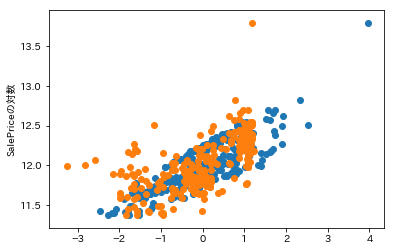

In [111]:
plt.scatter(X_test_std[:,0],y_pred,label ='GrLivArea' )
plt.scatter(X_test_std[:,1],y_pred,label = 'YearBuilt')
plt.ylabel("SalePriceの対数")

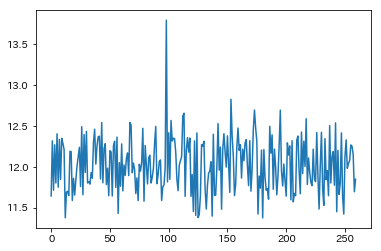

In [112]:
#y軸に予想されたSaleplaceの値をいれX軸にトレーニングデータの個数を１きざみで入れる。
X_amount = np.linspace(0,len(X_test_std[:,0])-1,len(X_test_std[:,0]))
plt.plot(X_amount,y_pred)
plt.show()

# 【課題3】手法の比較

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
clfs_list=[]
reg = LinearRegression()
clfs_list.append(reg)
regressor = DecisionTreeRegressor(random_state=0)
clfs_list.append(regressor)
regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
clfs_list.append(regr)
clf = SVR(gamma='scale', C=1.0, epsilon=0.2)
clfs_list.append(clf)

In [114]:
#テストデータが必要なのでデータセットを１２００で分割する
X_train = np.log(df.loc[:1200,['GrLivArea','YearBuilt']])
X_train_std = sc.fit_transform(X_train)
X_test =np.log(df.loc[1200:,['GrLivArea','YearBuilt']])
X_test_std = sc.fit_transform(X_test)

In [115]:
y_train = np.log(df.loc[:1200,['SalePrice']])
y_test = np.log(df.loc[1200:,['SalePrice']])

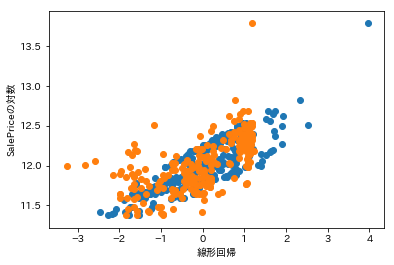

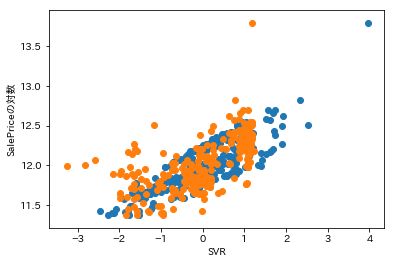

/anaconda3/envs/DIC/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


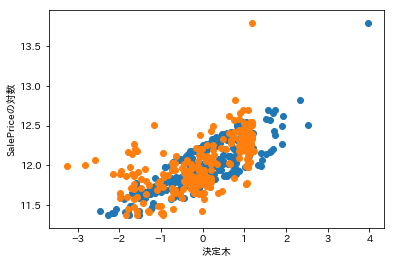

/anaconda3/envs/DIC/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


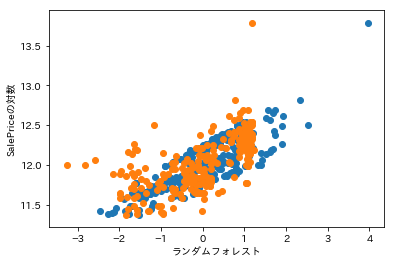

In [116]:
cls_score=[]
cls_ms=[]
#"線形回帰","SVR","決定木","ランダムフォレスト"の順で評価していく
index = ["線形回帰","SVR","決定木","ランダムフォレスト"]
for clf, clf_name  in zip(clfs_list,index):
    clf.fit(X_train,y_train)
    pred_y = clf.predict(X_test_std)
    plt.scatter(X_test_std[:,0],y_pred,label ='GrLivArea' )
    plt.scatter(X_test_std[:,1],y_pred,label = 'YearBuilt')
    plt.xlabel(str(clf_name))
    plt.ylabel("SalePriceの対数")
    plt.show()
    #平均二乗誤差をリストに追加
    cls_ms.append(mean_squared_error(y_test, y_pred))
    #学習の正解率を追加
    cls_score.append(clf.score(X_test,y_test))

In [117]:
data = {"実際のスコア":cls_score,"平均二乗誤差":cls_ms}
index = ["線形回帰","SVR","決定木","ランダムフォレスト"]
df = pd.DataFrame(data,index=index)
df

,実際のスコア,平均二乗誤差
線形回帰,0.653468,0.055078
SVR,0.505877,0.055078
決定木,0.564216,0.055078
ランダムフォレスト,0.614515,0.055078


今回はランダムフォレスト が一番スコアが高かった。平均二乗誤差は全て一緒。